In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Banking.csv')

In [3]:
df

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,09-10-2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,05-02-2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7


In [4]:
df.shape

(3000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [6]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest=True)

In [7]:
# Examine the distribution of unique categories in categorical columns
categorical_cols = df[["Risk Weighting","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Occupation","Income Band"]].columns
for col in categorical_cols:
  # if col in ["Client ID","Name","Joined Bank"]:
  #   continue
  print(f"\nValue Counts for '{col}':")
  display(df[col].value_counts())


Value Counts for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64


Value Counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64


Value Counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64


Value Counts for 'Fee Structure':


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64


Value Counts for 'Loyalty Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64


Value Counts for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64


Value Counts for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64


Value Counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64


Value Counts for 'Income Band':


Mid     1517
Low     1027
High     456
Name: Income Band, dtype: int64

In [8]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64


In [10]:
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='%d-%m-%Y')
print(df['Joined Bank'].dtype)

datetime64[ns]


## Numerical Analysis

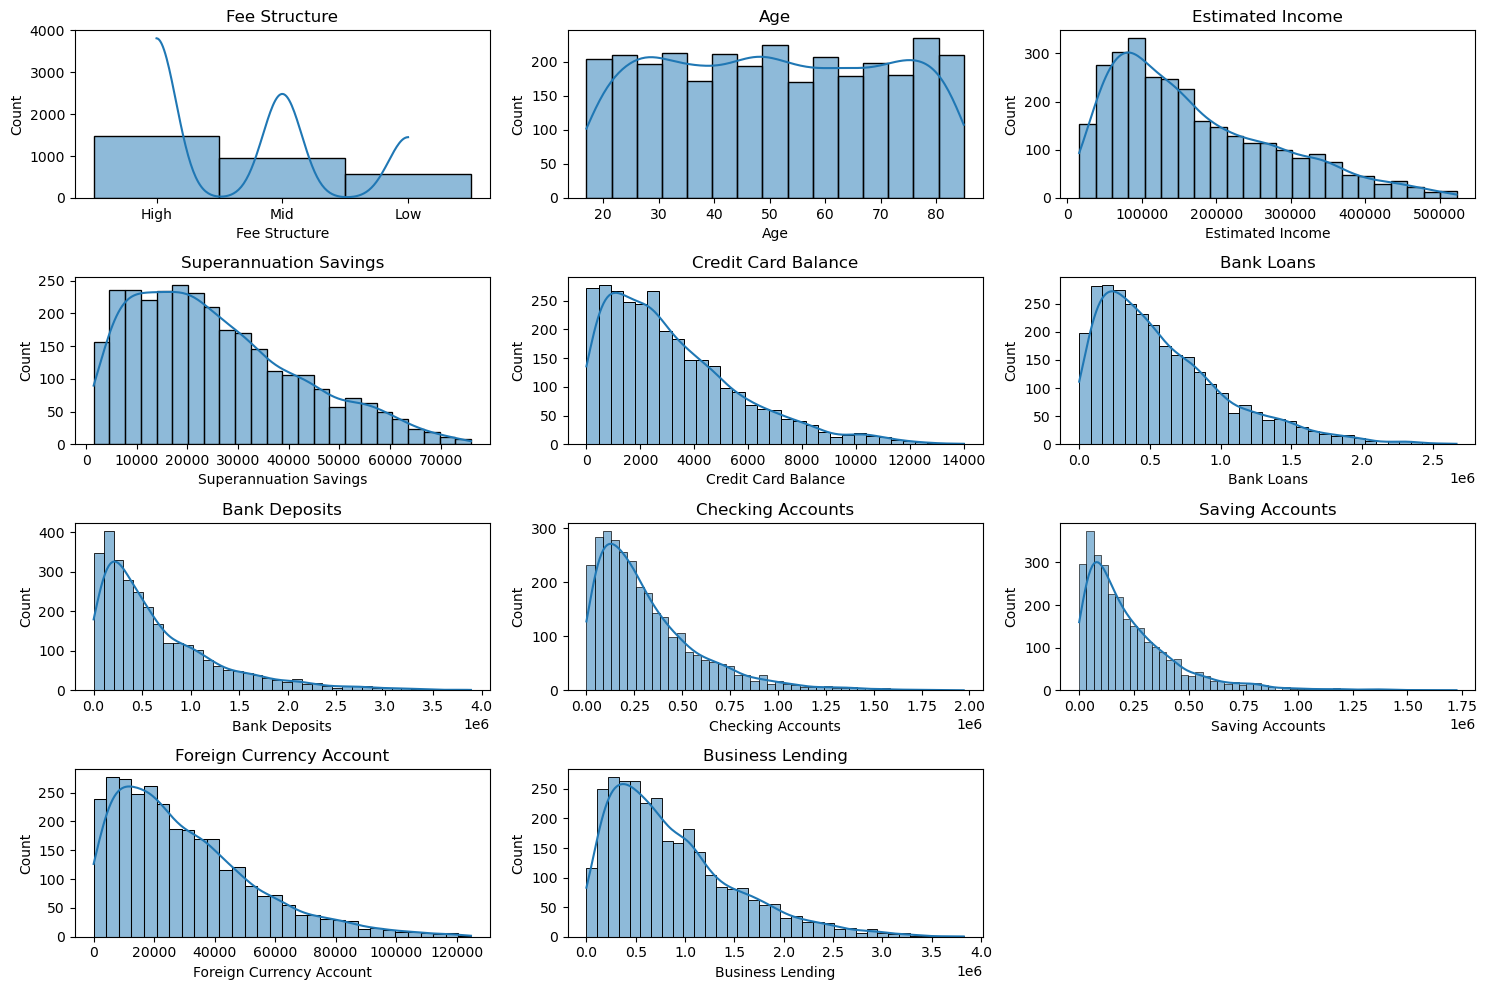

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical analysis and exploration
numerical_cols = ['Fee Structure','Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

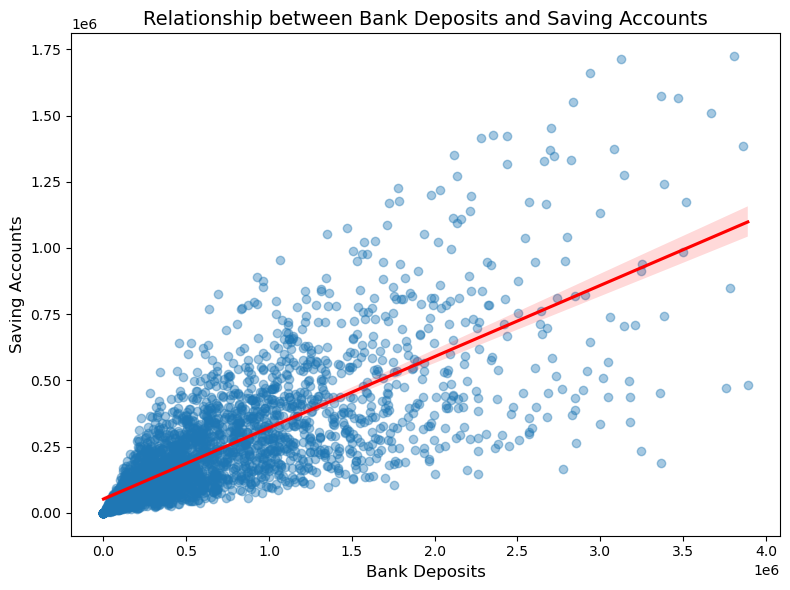

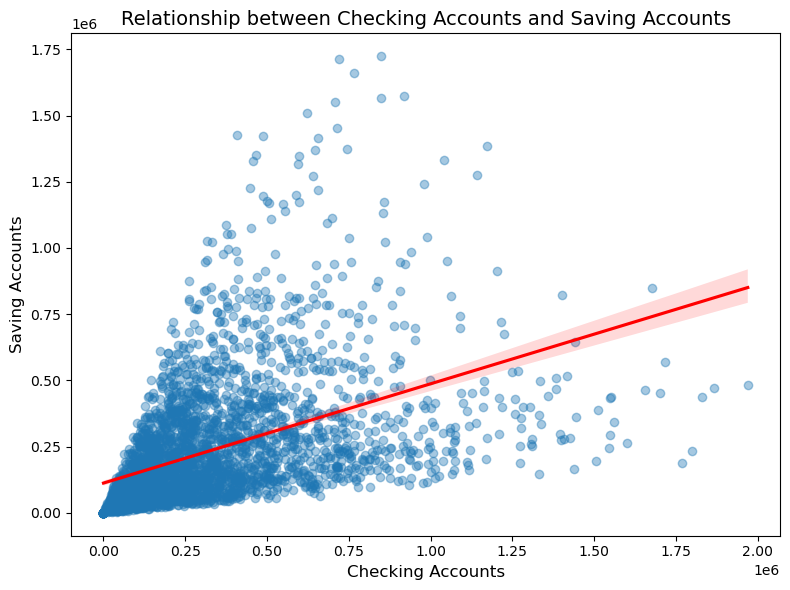

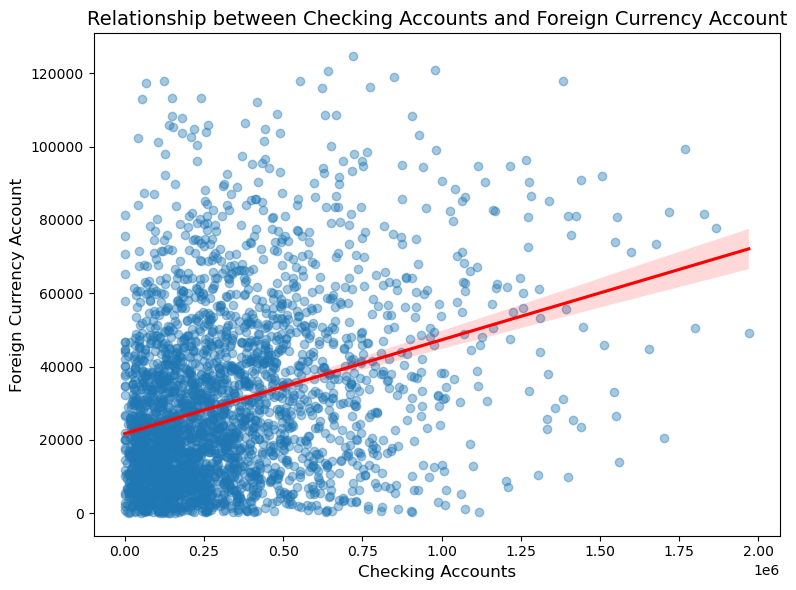

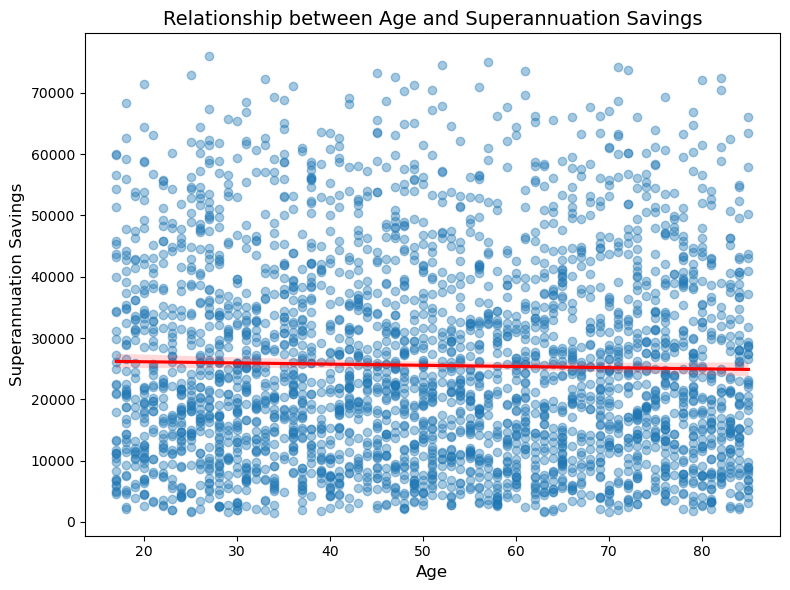

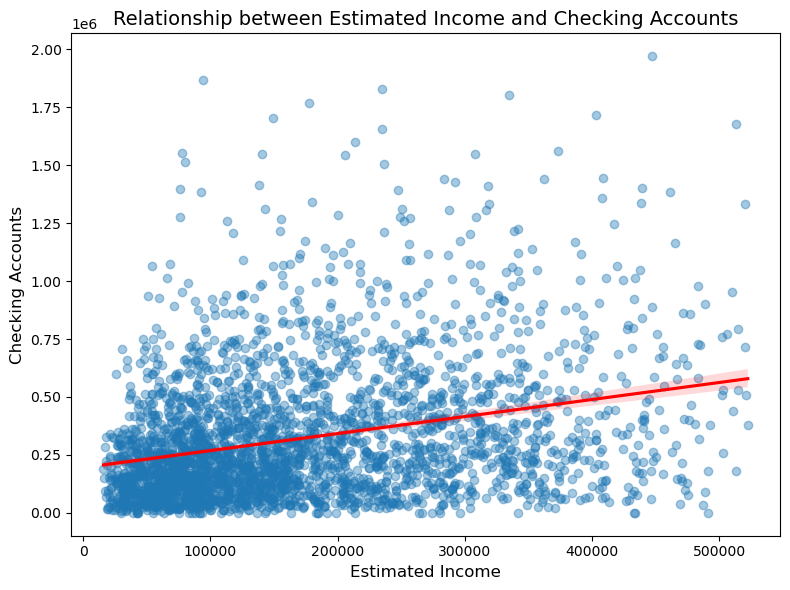

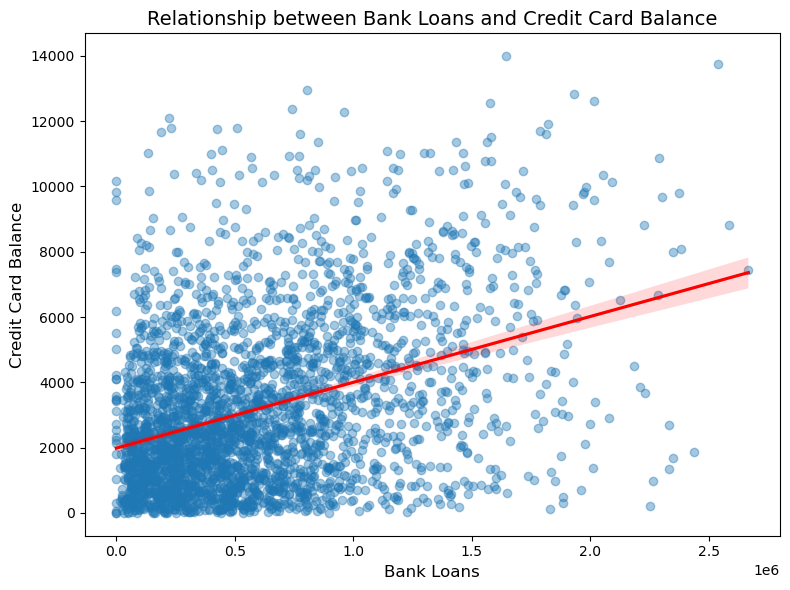

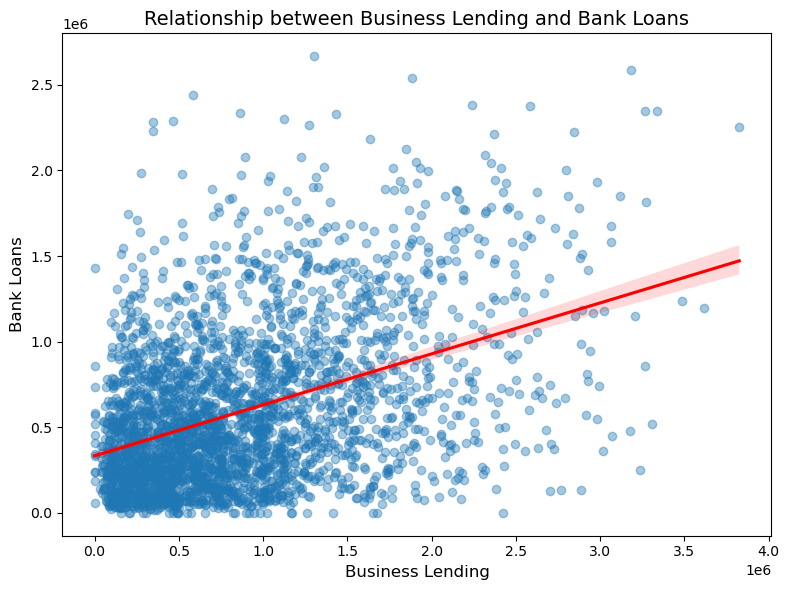

In [12]:
pairs_to_plot = [
    ('Bank Deposits', 'Saving Accounts'),
    ('Checking Accounts', 'Saving Accounts'),
    ('Checking Accounts', 'Foreign Currency Account'),
    ('Age', 'Superannuation Savings'),
    ('Estimated Income', 'Checking Accounts'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Business Lending', 'Bank Loans'),
]


for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},     # semi-transparent points
        line_kws={'color': 'red'}       # best-fit line color
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()

In [13]:
# Generate descriptive statistics for the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [14]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<AxesSubplot:>

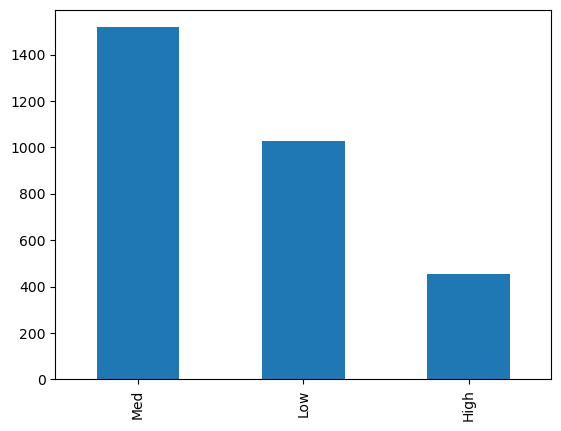

In [15]:
df['Income Band'].value_counts().plot(kind='bar')

In [16]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'BRId':


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64

Value Counts for 'GenderId':


2    1512
1    1488
Name: GenderId, dtype: int64

Value Counts for 'IAId':


1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: IAId, dtype: int64

Value Counts for 'Amount of Credit Cards':


1    1922
2     765
3     313
Name: Amount of Credit Cards, dtype: int64

Value Counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64

Value Counts for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64

Value Counts for 'Loyalty Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64

Value Counts for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64

Value Counts for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64

Value Counts for 'Income Band':


Med     1517
Low     1027
High     456
Name: Income Band, dtype: int64

## Univariate Analysis

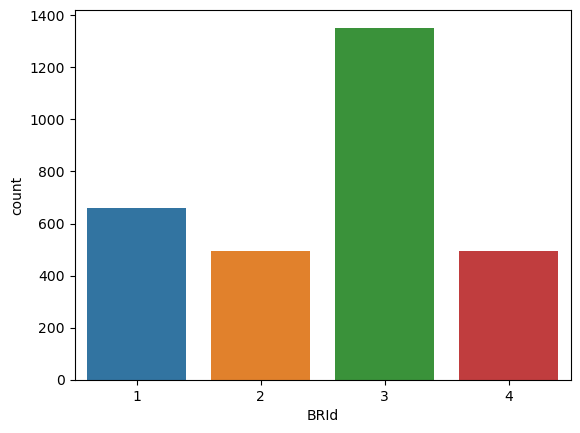

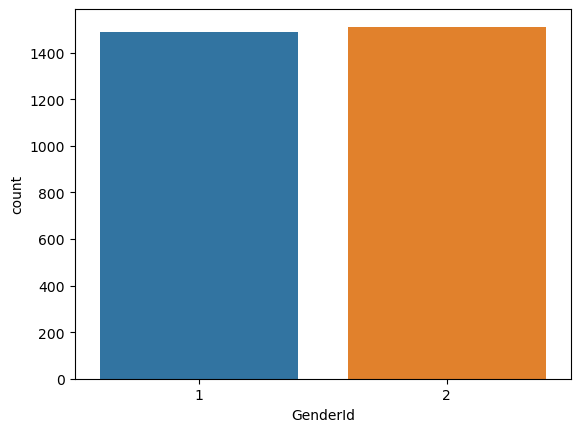

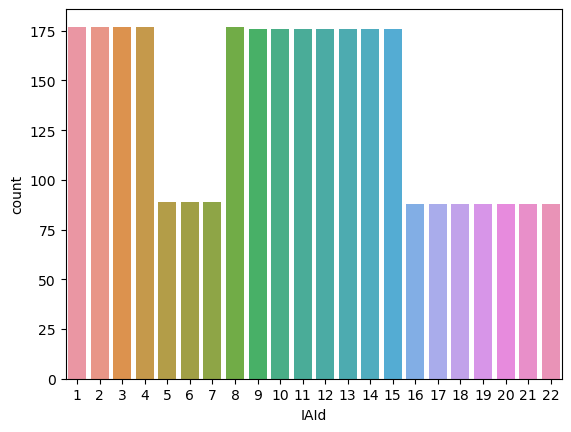

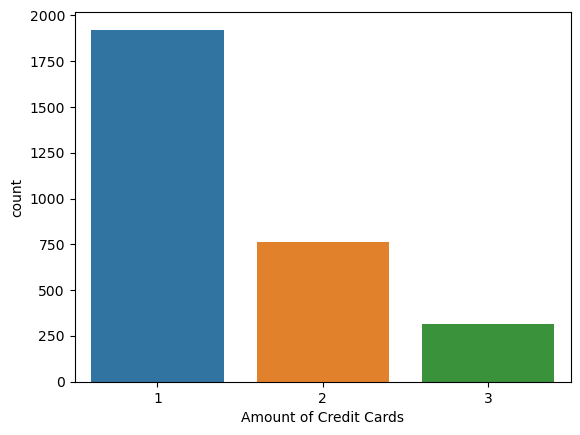

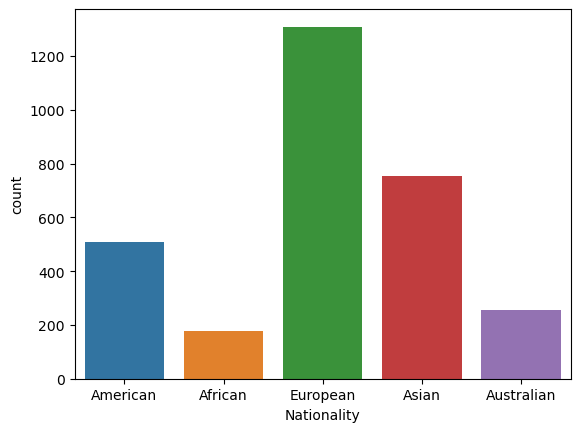

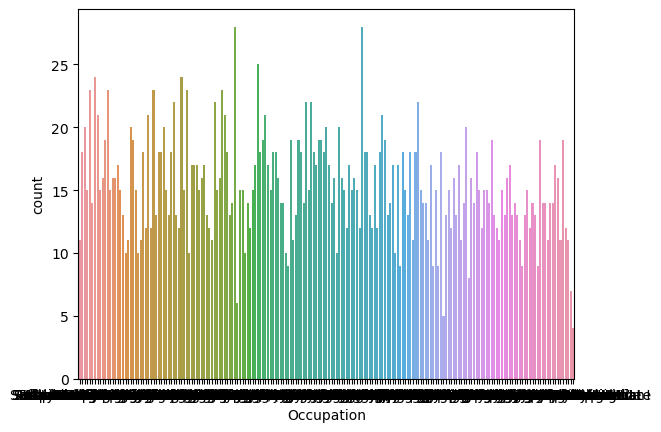

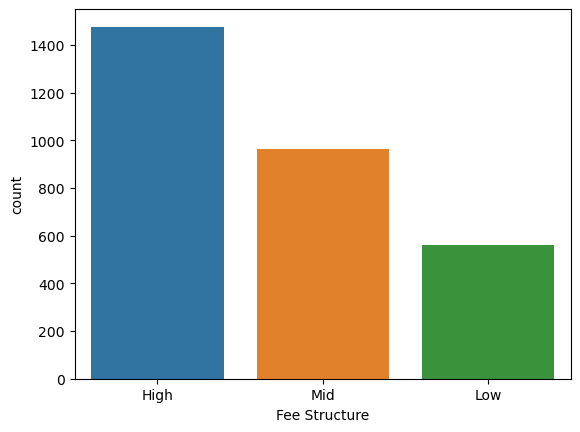

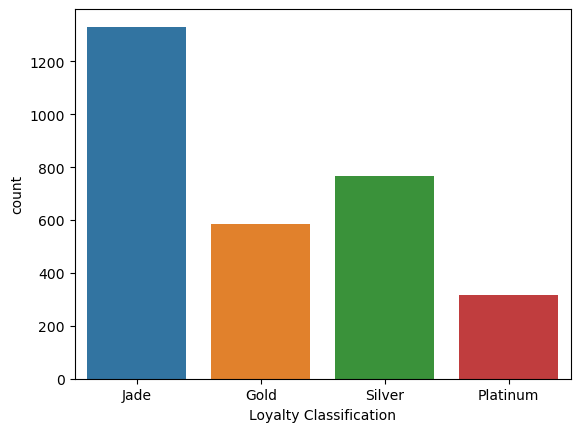

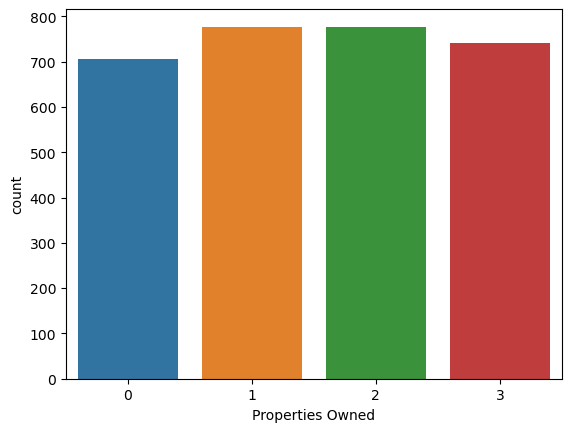

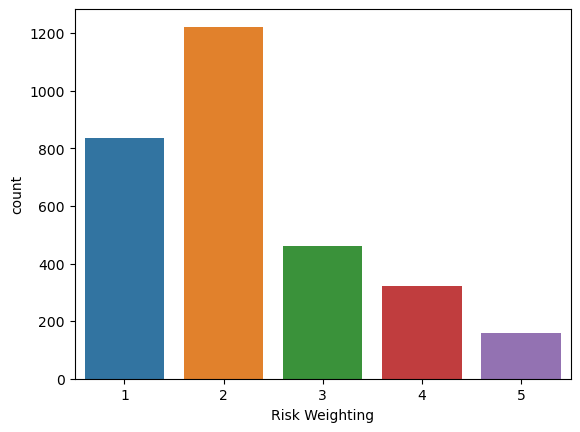

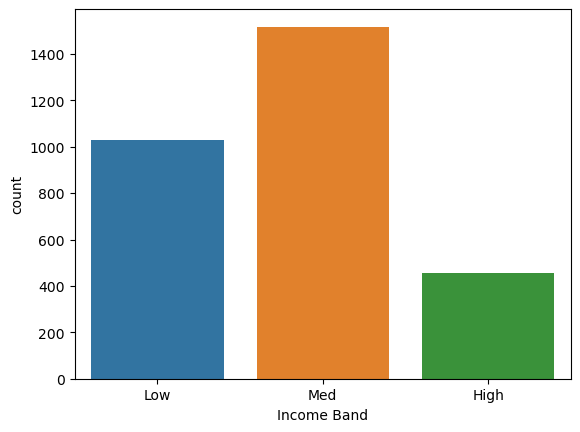

In [17]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

## Bivariate Analysis

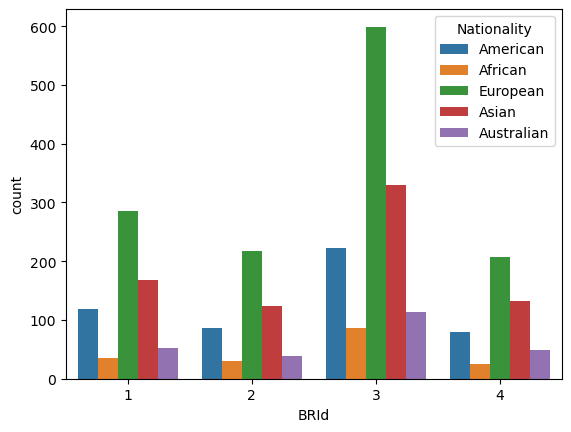

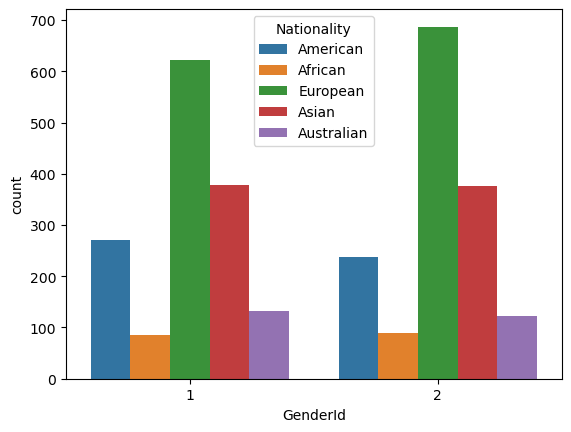

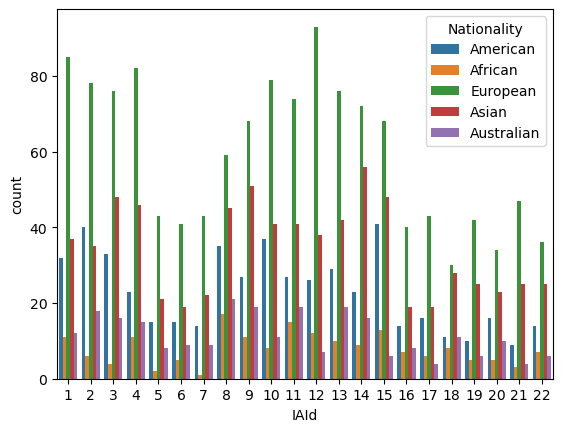

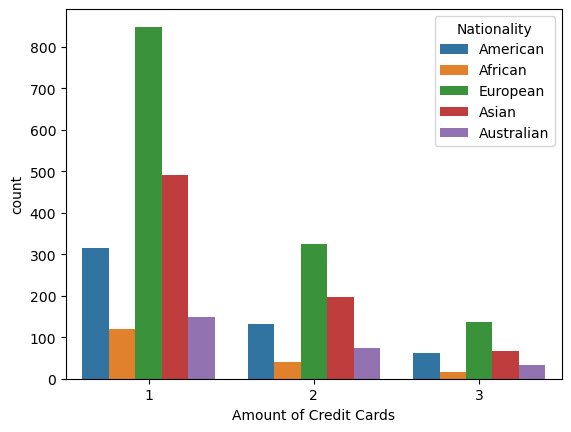

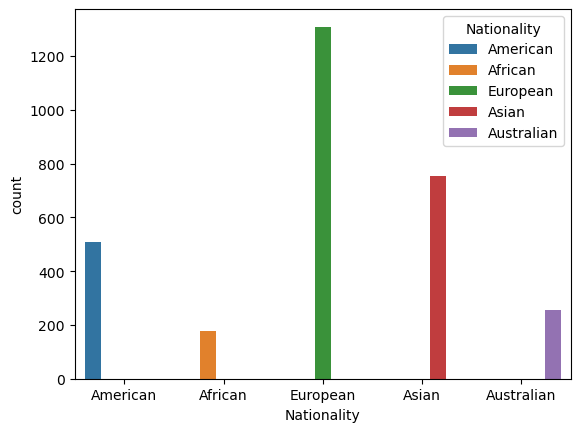

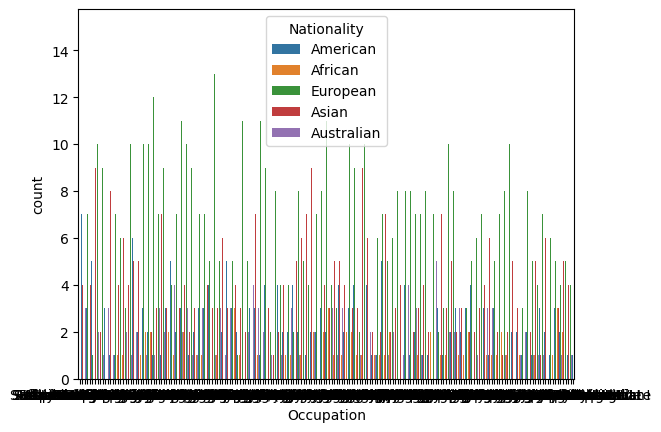

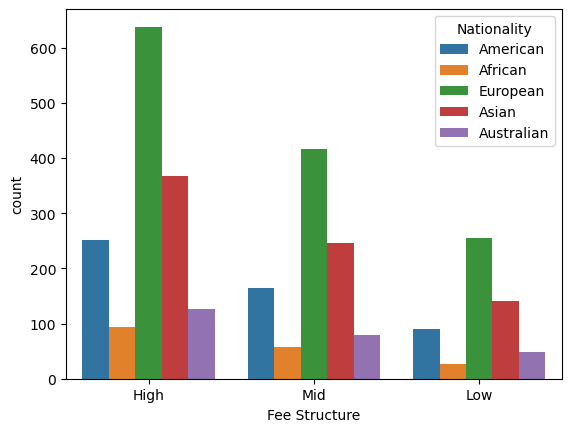

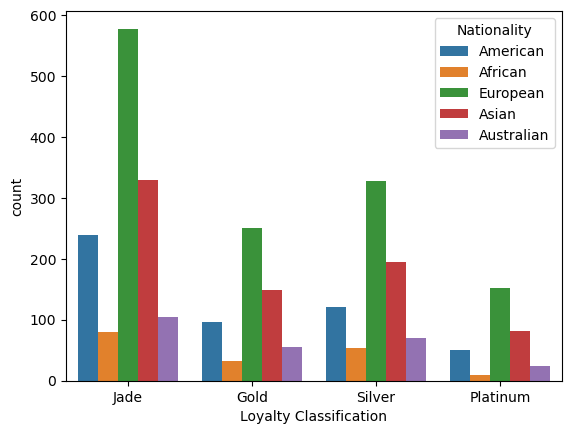

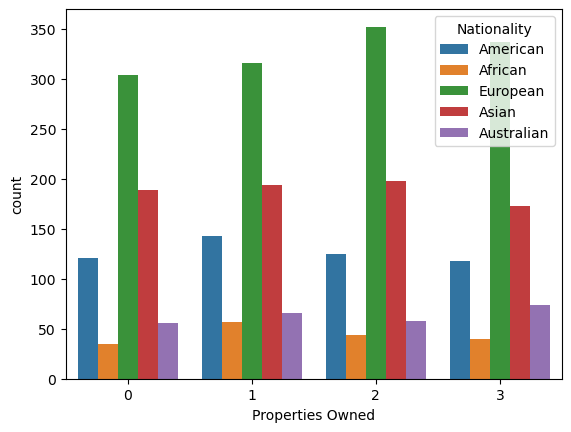

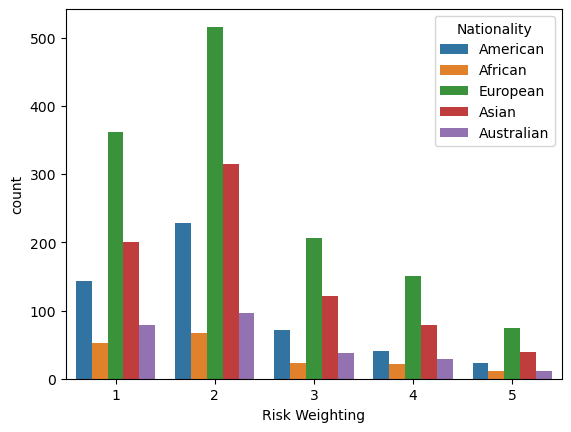

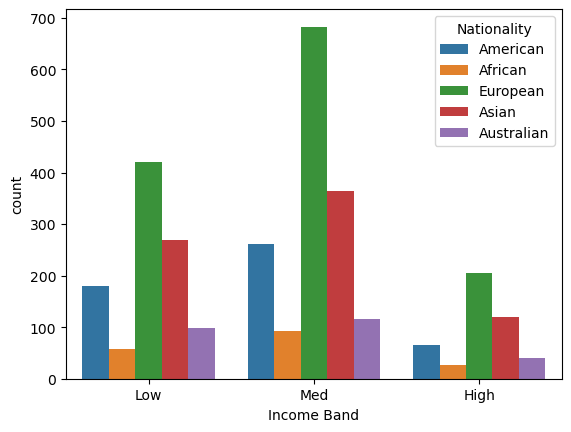

In [18]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

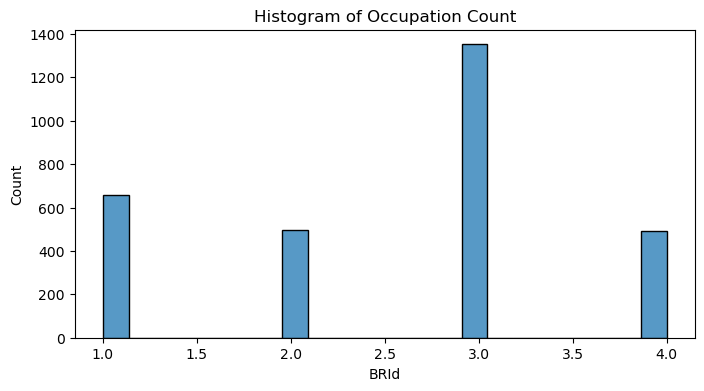

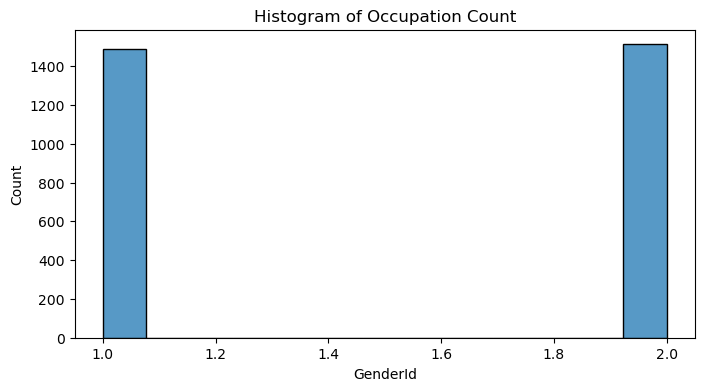

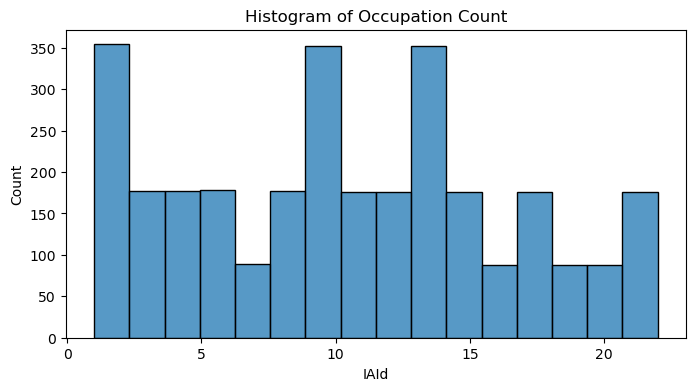

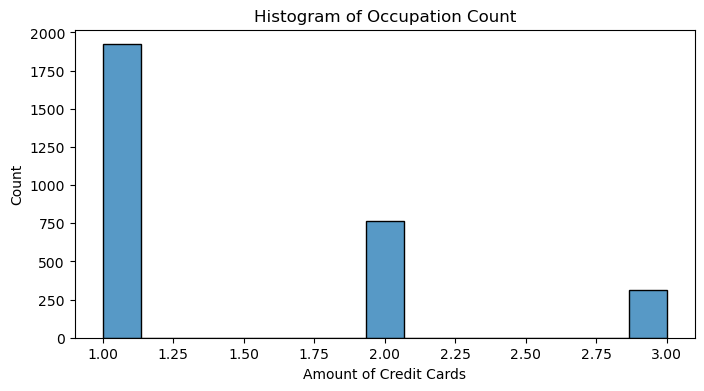

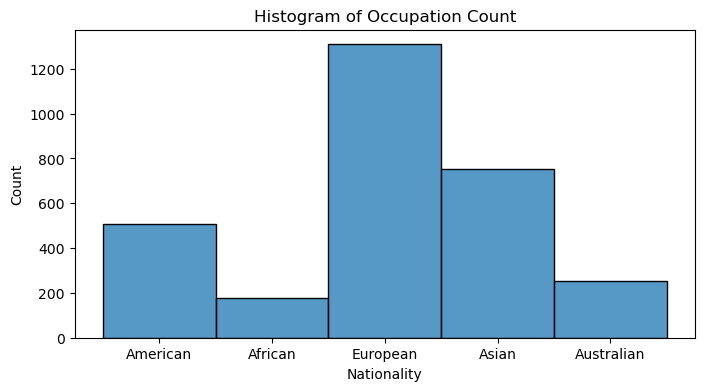

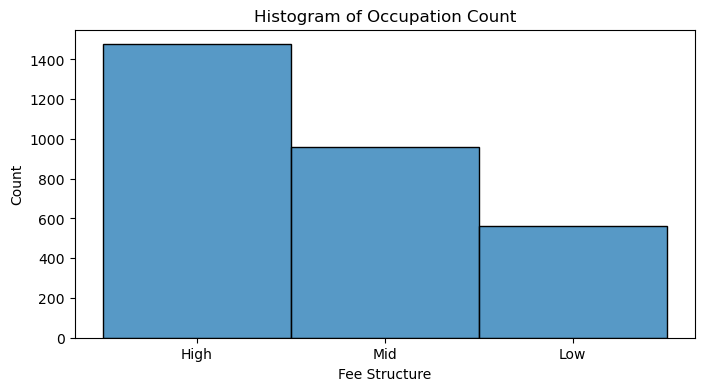

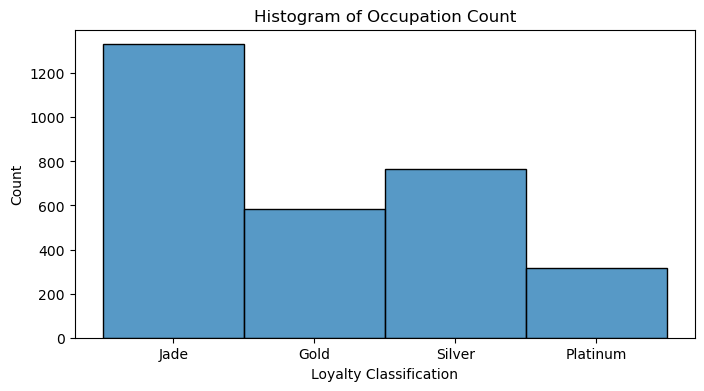

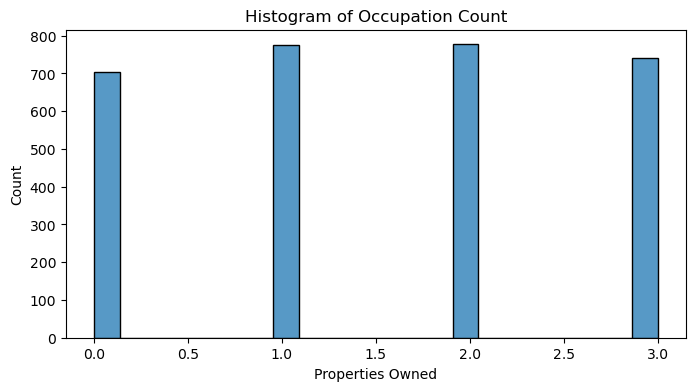

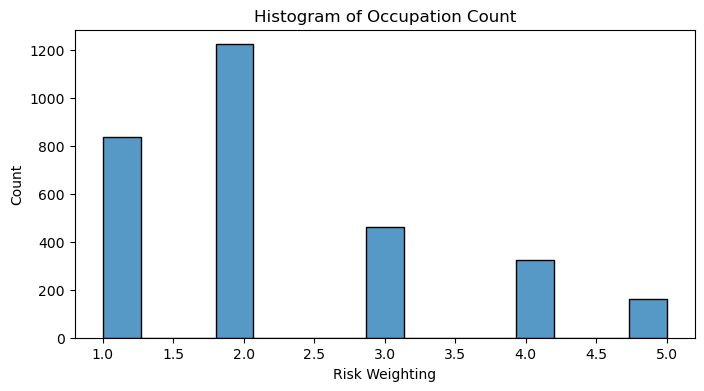

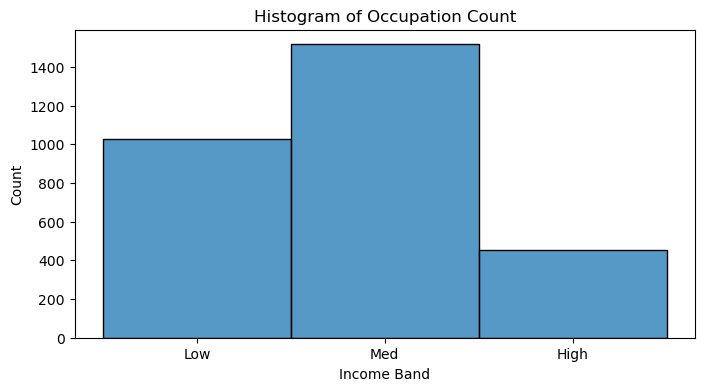

In [19]:
# HIstplot of value counts for different Occupation

for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

## Heatmaps

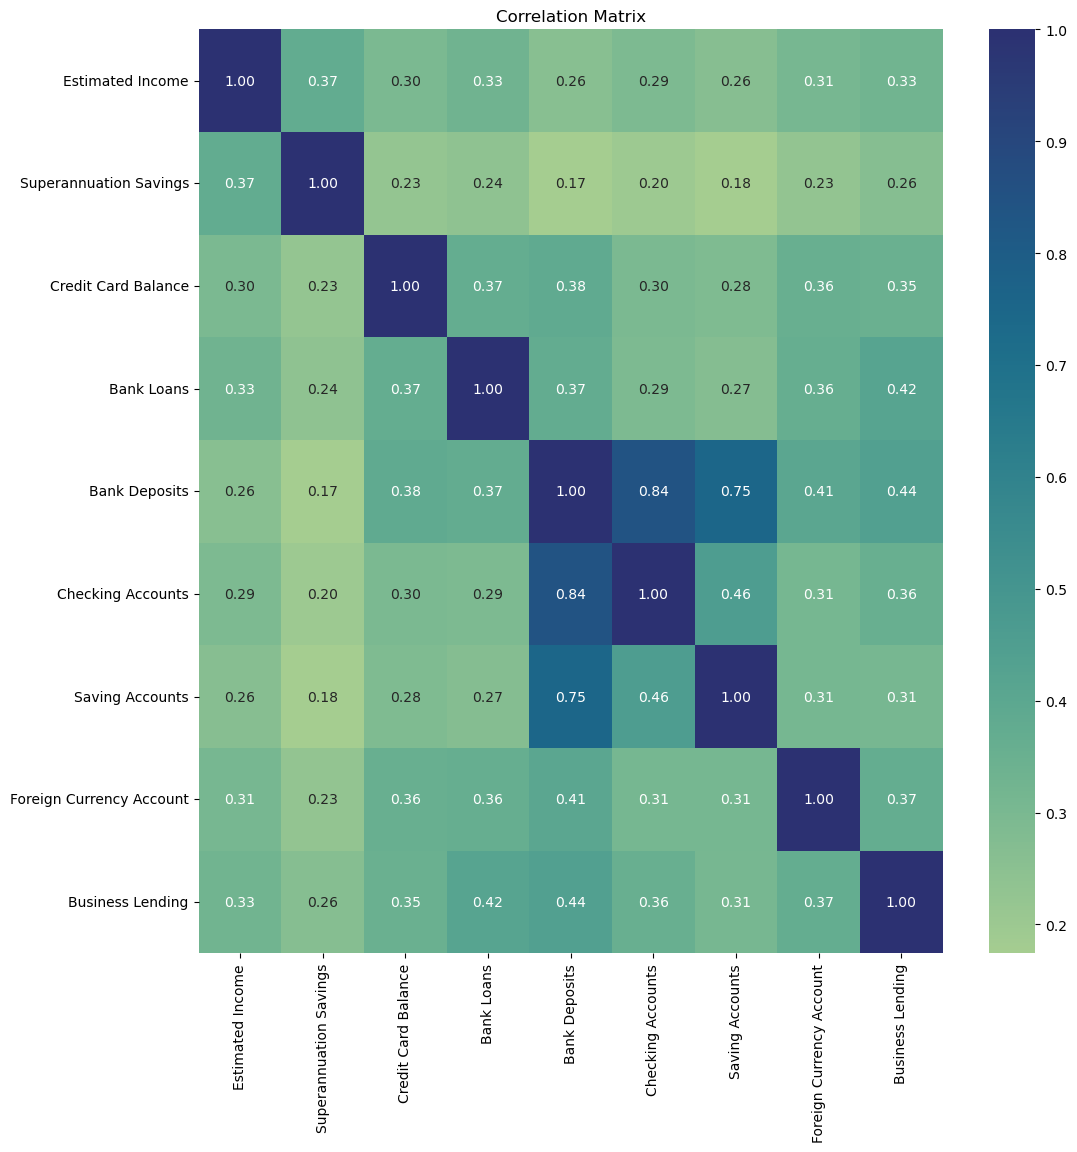

In [20]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Insights of EDA:

1. The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold substantial amount/funds across other accounts as well.


## Deposits and Savings Behavior

The high correlation between Bank Deposits and Saving Accounts suggests that these may either measure overlapping financial behavior (e.g., total funds a customer keeps in the bank) or that people who actively deposit funds also tend to maintain or grow savings balances.


## Income, Age, and Accumulation

Moderate correlations of Age and Estimated Income with various balances (Superannuation, Savings, Checking) reflect a common financial lifecycle trend: higher income earners and older individuals often accumulate more savings, retirement funds, and may carry higher credit card balances or loans.


## Low Correlation with Properties Owned

Property ownership may depend on external factors (location, real estate market conditions, inheritance, etc.) that are not captured by these particular banking variables. Hence, we see weaker correlations here.